# Aim of the experiment
In this assignment we aim to observe the error made by the least-mean square fit function 
from the scipy library and observe the relation between error and noise.

# Procedure

## Part 0
Importing required libraries.

In [1]:
from pylab import *
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.linalg as linalg
import time

## Part 1-3

The given code is excecuted to generate noisy data of linear combination of 'bessel' function. 
*f(t) = 1.05J(t)-0.105t*

In [2]:
N=101 # no of data points
k=9 # no of sets of data with varying noise
# generate the data points and add noise

t=linspace(0,10,N) # t vector
y=1.05*sp.jv(2,t)-0.105*t # f(t) vector
Y=meshgrid(y,ones(k),indexing='ij')[0] # make k copies
scl=logspace(-1,-3,k) # noise stdev
n=dot(randn(N,k),diag(scl)) # generate k vectors
yy=Y+n # add noise to signal

## Part 4

A function g(t) is written which takes two arguments A,B, and returns a answer of the linear 
combination of 'bessel' function. Then the noisy data is plotted along with the true value 
of the function.

In [3]:
def g(t,A=1.05,B=-0.105):
    y=A*sp.jv(2,t)+B*t
    return y

In [4]:
arr = []
for i in range(9):
    arr.append('\u03C3'+str(i+1)+' = '+str(round(scl[i],3)))
arr.append('True Value')

#true value of the function without noise as calculated by the function g 
gt = np.array(g(t))[:, None]

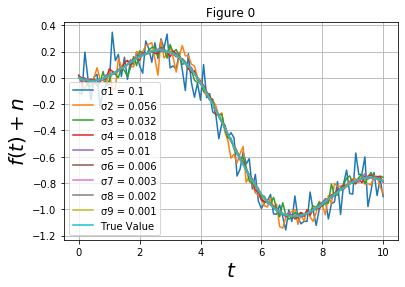

In [5]:
#gt contains true value of the function without noise
y = np.concatenate((yy,gt),axis=1)
#plotting the noisy data and true value of the function
lines = plot(t, y)
legend(lines, arr)
xlabel(r'$t$',size=20)
ylabel(r'$f(t)+n$',size=20)
title(r'Figure 0')
grid(True)
#savetxt("fitting.dat",c_[t,yy]) # write out matrix to file
show()

## Part 5
Plotting errorbar for a noise containing sigma value as 0.1. 
Errorbar gives us the possible range of error in the plot. 

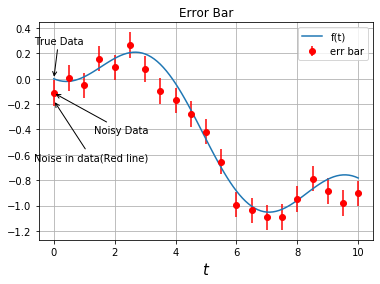

In [6]:
data = yy
#plotting error bar
errorbar(t[::5],yy[:,0][::5],0.1,fmt='ro',label='err bar')
#plotting the true value
plot(t,gt,label='f(t)')
xlabel(r'$t$',size=15)
title("Error Bar")
#adding annotations
annotate("Noisy Data",(t[0], data[0, 0]), xytext=(40, -40), textcoords="offset points", arrowprops={"arrowstyle": "->"})
annotate("True Data",(t[0], g(t[0])), xytext=(-20, 35), textcoords="offset points", arrowprops={"arrowstyle": "->"})
annotate("Noise in data(Red line)",(t[0], data[0, 0]-0.06), xytext=(-20, -60), textcoords="offset points", arrowprops={"arrowstyle": "->"})
legend()
grid()
show()

## Part 6
Here, we are creating the M and p matrices. First, we are generating the function values 
for the given time and then fill the values in the M matrix. The values of matrix p 
can be anything, so we initialise the value of p matrix randomly. This function returns 
the M matrix which will be used later.

In [7]:
def Q6():
    global yy, gt, t
    M = np.zeros((101,2))
    p = np.zeros((2,1))
    #initiating M matrix with corresponding values
    for i in range(101):
        M[i,0] = sp.jv(2,t[i]) 
        M[i, 1] = t[i]
    #initiating p matrix with corresponding values
    p[0,0] = 1.0
    p[1,0] = 0.5

    #calculating the ans using matrix multiplication of M and p matrix
    ans = np.matmul(M,p)
    g_ans = np.array(g(t,1.0,0.5))[:,None]

    chk_ans = np.array_equal(ans, g_ans)
    #print(chk_ans)
    return M

## Part 7-8
In this part, we are trying to find the values of A ans B which has the least mean 
square error. We are trying out different values of A and B. Then we are plotting 
the contours of error we get for those different values of A and B. Here, from the 
plot we can see that the error value converges to 0 at the point A=1.05, B=-0.105.

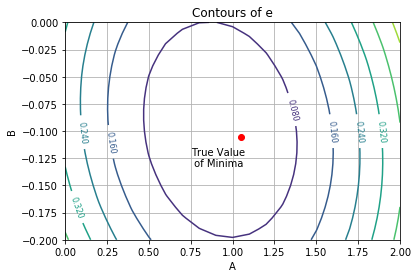

In [8]:
#intialising some values of A and B
A_chk = linspace(0,2,21)
B_chk = linspace(-0.2,0,21)
e = np.zeros((len(A_chk), len(B_chk)))

#calculating error value for each value of A and B
for i in range(len(A_chk)):
    for j in range(len(B_chk)):
        e[i, j] = mean(square(g(t,A_chk[i],B_chk[j])-yy[:,0]))

x, y = np.meshgrid(A_chk, B_chk)
#plotting contours of error
co = contour(x, y, e)
plot([1.05],[-0.105],'ro')
annotate("True Value\n of Minima", (1.05, -0.105),xytext=(-50, -30), textcoords="offset points")
xlabel('A')
ylabel('B')
clabel(co, co.levels[:5], inline=1, fontsize=8)
title('Contours of e')
grid()
show()

## Part 9-11
Here, we use data added with noise having different values of sigma to predict the 
values of A and B. We are using the scipy function *lstsq*. This function finds the 
value of A and B for which the mean-square is minimum.
Then, we are plotting the error in the calculated the values of A and B with respect 
to the sigma values. We would be plotting the error in the calculated values in both 
normal scale and log-log scale.

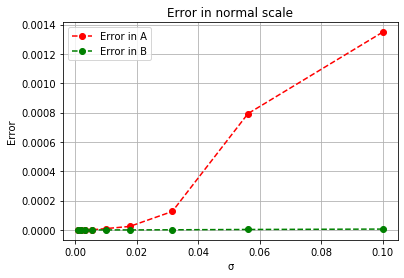

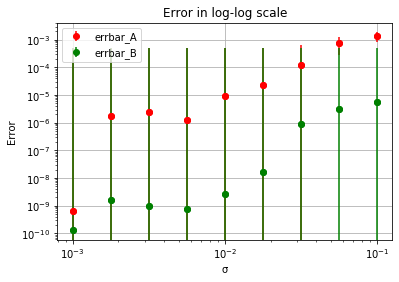

In [9]:
M = Q6()
AB = []
err_A = []
err_B = []
#solving for A and B using different noisy data
#solving is done in a way such that MSE is minimum
for i in range(9):
    tmp = linalg.lstsq(M, yy[:,i])
    AB.append(tmp[0])
    err_A.append(square(tmp[0][0]-1.05))
    err_B.append(square(tmp[0][1]+0.105))
#plotting error in A and in normal scale
plot(scl,err_A,'--ro',label='Error in A')
plot(scl,err_B,'--go',label='Error in B')
xlabel('\u03C3')
ylabel('Error')
title('Error in normal scale')
grid()
legend()
show()

#plotting error in A and in log-log scale
x = logspace(-1,-3,9)
loglog(x,err_A,'ro')
loglog(x,err_B,'go')
errorbar(x,err_A,0.0005,fmt='ro',label='errbar_A')
errorbar(x,err_B,0.0005,fmt='go',label='errbar_B')
xlabel('\u03C3')
ylabel('Error')
title('Error in log-log scale')
legend()
grid()
show()

# Conclusion
From the above experiment, we found the error generated for different values of the standard deviation of the noise. 
We can see from the plots that the value of log of error varies linearily with the log of standard deviation of the noise.